<a href="https://colab.research.google.com/github/Razakmd2024/Razakmd2024/blob/main/ubdmis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project:  EDA of Unified Births & Deaths Registrations 
Project 2 : Unified Birth & Death MIS Report….

Language: Python

Used Modules: Pandas, Numpy, matplotlib and seaborn.

Development Platform: Google collaborators…

AIM :- Generate the Gram Panchayat wise, Mandal Wise, District wise MIS Report by one click… 

Procedure: Follow the ETL process…..
Extract data from DATA SOURCE (i.e., UBD web portal)
Transform/ Cleaning Data 
i) Select concern table
ii) Assign Header / Columns
iii) Split the Birth / Death records
iv) Do Type Conversion (Object to Integer)
V) Drop unnecessary Columns
VI) Finalize Data Set
Load Dataset as DataFrame

Result:While running the above code…. 
Extracting data from UBD portal → Asking User to Enter His District Name → Press Enter → Backed process will start → Finally User Will get Concern District MIS Report….i.e.,
Gram Panchayat wise UBD MIS report with percentage wise Digital sign Birth /Death columns
Mandal Wise UBD MIS Report…
District Wise UBD MIS Report
Token Mapped Report
Percentage of UBD Token Mapped Report 
Visualization 


Hi Everyone...
Code Execution process as started.. please wait for some more time
District Namess are:- ['ADILABAD' 'BHADRADRI KOTHAGUDEM' 'HANUMAKONDA' 'JAGTIAL' 'JANGOAN'
 'JAYASHANKAR BHUPALPALLI' 'JOGULAMBA GADWAL' 'KAMAREDDY' 'KARIMNAGAR'
 'KHAMMAM' 'KOMARAMBHEEM ASIFABAD' 'MAHABUBABAD' 'MAHABUBNAGAR'
 'MANCHERIAL' 'MEDAK' 'MEDCHAL MALKAJIGIRI' 'MULUGU' 'NAGARKURNOOL'
 'NALGONDA' 'NARAYANPET' 'NIRMAL' 'NIZAMABAD' 'PEDDAPALLI'
 'RAJANNA SIRCILLA' 'RANGAREDDY' 'SANGAREDDY' 'SIDDIPET' 'SURYAPET'
 'VIKARABAD' 'WANAPARTHY' 'WARANGAL' 'YADADRI BHUVANAGIRI']


Enter your District Name(from Above List copy and paste in box):   PEDDAPALLI
0 Reg.Unit Id District Name Mandal Name Gram Panchayat Name  \
0        2936    PEDDAPALLI  Anthargaon          Akenapalli   
1        2937    PEDDAPALLI  Anthargaon          Anthergoan   
2        2938    PEDDAPALLI  Anthargaon        Brahmanpalli   
3        2939    PEDDAPALLI  Anthargaon            Eklaspur   
4       25329    PEDDAPALLI  Anthargaon   

<Figure size 1152x360 with 0 Axes>

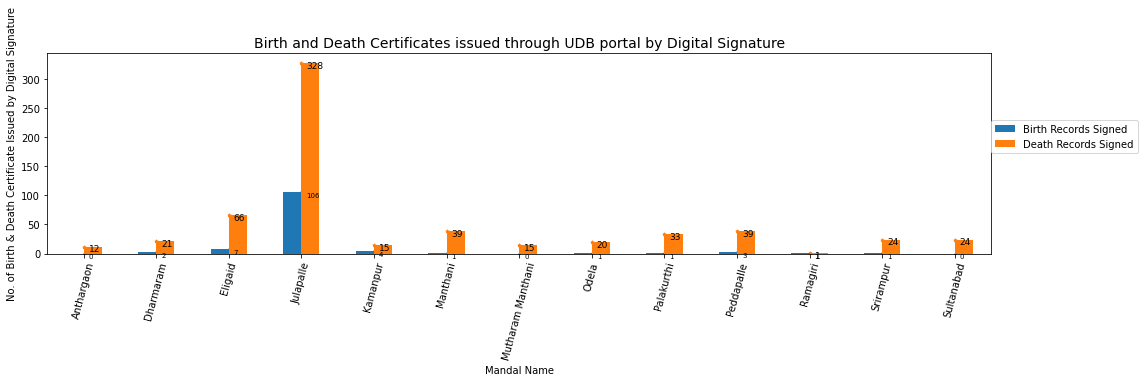

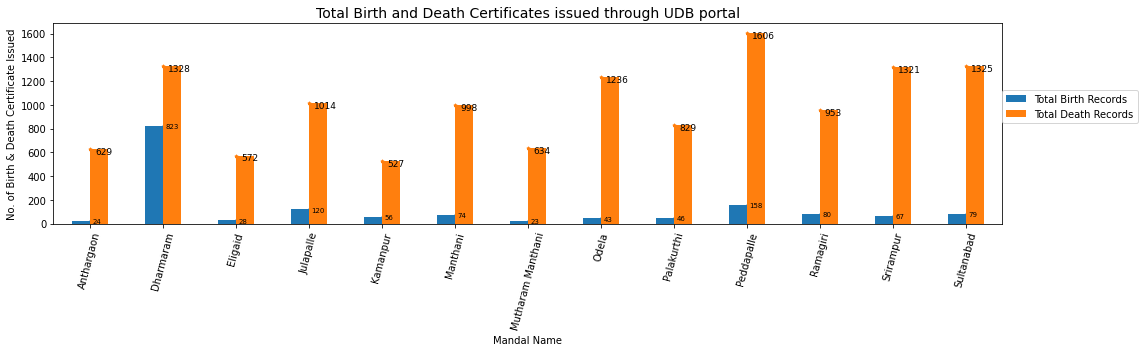



PEDDAPALLI District, Mandal and GP wise UBD MIS report files saved successfully
Thanks for Running the code
With Regards:: 
 MD.RAZAK 
 DPM e-Panchayat 
 O/o DPO Peddapalli 
 Email: dpmupeddapalli@gmail.com


In [ ]:
print('Hi Everyone...')
print('Code Execution process as started.. please wait for some more time')
# Load Required Libraries 
import pandas as pd
import numpy as np
from pandas import read_html
import matplotlib.pyplot as plt
import seaborn as sns

# Read the url of Urban local bodies from UBDMIS report page
url="http://ubdmis.telangana.gov.in/ubdmisTGTotalStatus.do?rlb_type=3&pstcode=35&style=bluetheme"

# Copying the url data into new Object
ubd=pd.io.html.read_html(url)

# Above UBD object contains two tables.. consider only required table for data analysis
table=ubd[1]   # copying table into table object
data=table.copy()    #make a copy of original data

# Assign the first row data to the dataframe columns Attribute 
data.columns = data.iloc[0]         #Assign the row[0] as a header
data.drop(0, axis=0,inplace=True)   # Dropping col 0
data=data.reset_index()             # reset sl.no
data.drop(['index','Sl.No'], axis=1, inplace=True)

# spliting birth records
birth=data['Birth Records Signed / Total Birth Records'].str.split(" /  ",n=1, expand=True)
data['Birth Records Signed']=birth[0]
data['Total Birth Records']=birth[1]
data.drop(['Birth Records Signed / Total Birth Records'], axis=1,inplace =True)

# spliting death records
death = data['Death Records Signed / Total Death Records'].str.split(" /  ",n=1, expand =True )
data['Death Records Signed']=death[0]
data['Total Death Records']=death[1]
data.drop(['Death Records Signed / Total Death Records'], axis=1, inplace= True)

# Removing the total row
data.drop(12769, axis=0, inplace =True)

# Converting Birth and Death dtypes (object to Int64)
data=data.astype({'Birth Records Signed':'int64', 'Total Birth Records':'int64', 'Death Records Signed':'int64', 'Total Death Records':'int64'})

# replace categories of values to 1 and 0 in token registration columns
data.replace('Yes',1, inplace=True)
data.replace('No',0, inplace=True)

# Renaming the office and token cols
data.rename(columns={'Office Title':'Gram Panchayat Name', 'Token Registered(Yes/No)':'Token Registered GPs'},inplace=True)

data['% of Birth Certificates given by Digitally']=round(data['Birth Records Signed']/data['Total Birth Records']*100,2)
data['% of Death Certificates given by Digitally']=round(data['Death Records Signed']/data['Total Death Records']*100,2)
data=data.fillna(0)
#summarization columns
col=['Token Registered GPs','Birth Records Signed','Total Birth Records', 'Death Records Signed', 'Total Death Records']
avg_col=['% of Birth Certificates given by Digitally','% of Death Certificates given by Digitally']

#District wise consolidation 
state=pd.pivot_table(data, index='District Name', values =col, margins =True, margins_name='Total', aggfunc='sum')
state['% of Birth Certificates given by Digitally']=round(state['Birth Records Signed']/state['Total Birth Records']*100,2)
state['% of Death Certificates given by Digitally']=round(state['Death Records Signed']/state['Total Death Records']*100,2)
state=state.fillna(0)

# Choose District Wise MIS reports
print('District Namess are:-', data['District Name'].unique())
print("\n")
x=input('Enter your District Name(from Above List copy and paste in box):   ')

# Generate the GP wise report of concern District 
dist_gps=data[data['District Name']==x]
dist_gps=dist_gps.reset_index()
dist_gps.drop('index',axis=1,inplace=True)
print(dist_gps.head())

#Digital token not Mapped GPs list 
token_not_mapped_gps=dist_gps[dist_gps['Token Registered GPs']==0].reset_index().drop(['index','Birth Records Signed','Total Birth Records', 'Death Records Signed', 'Total Death Records', '% of Birth Certificates given by Digitally','% of Death Certificates given by Digitally'], axis=1)
#print('\n')

# Mandal wise Abstract report of Concern District 
mdl_abs=pd.pivot_table(dist_gps,index=['District Name','Mandal Name'], values=col, aggfunc='sum', margins=True, margins_name='Total')
mdl_abs['% of Birth Certificates given by Digitally']=round(mdl_abs['Birth Records Signed']/mdl_abs['Total Birth Records']*100,2)
mdl_abs['% of Death Certificates given by Digitally']=round(mdl_abs['Death Records Signed']/mdl_abs['Total Death Records']*100,2)
mdl_abs=mdl_abs.fillna(0)
print(mdl_abs.head())
print('\n')

# Mandal wise Digital token mapped percetage 

tokens=dist_gps.groupby('Mandal Name')[['Gram Panchayat Name','Token Registered GPs']].agg(Total_GPs=('Gram Panchayat Name','count'), Digital_Token_Mapped_GPs=('Token Registered GPs','sum'))
tokens['% of Token Mapping']=round(tokens['Digital_Token_Mapped_GPs']/tokens['Total_GPs']*100,2)
tokens=tokens.sort_values('% of Token Mapping', ascending =False)
#print(tokens.head())
print('\n')

# Create a Pandas Excel writer using XlsxWriter .
writer =pd.ExcelWriter('UBDMISREPORT.xlsx')
dist_gps.to_excel(writer, sheet_name='gpwiseReport', index_label='Sl.No')                                # Gram Panchayat wise Unified Birth& Death Report
mdl_abs.to_excel(writer, sheet_name='mdl_abstract')                                                       # Mandal wise Unified Birth & Death Report 
state.to_excel(writer, sheet_name='Dist_abstract')                                                        # District wise Unified BIrth & Death Report 
token_not_mapped_gps.to_excel(writer, sheet_name='Digital_Token_pending_GPs',index_label='Sl.No')       # Token not mapped Gram Panchayats
tokens.to_excel(writer, sheet_name='Tokens_Mapped_percentage')                                          # Mandal Wise token Mapped percentage
writer.save()

# Visualization 
scat=mdl_abs.droplevel(0)
scat.drop("",axis=0,inplace=True)
plt.figure(figsize=(16,5))
# Birth and Death Digitally issued Report 
scat[['Birth Records Signed','Death Records Signed']].plot(kind='bar', figsize=(16,5))
plt.scatter(scat.index, scat['Birth Records Signed'], marker='.', s=10)
for i, k in zip(scat.index,scat['Birth Records Signed']):
    plt.annotate(k,xy=(i,k), xytext=(5,-5), textcoords=('offset points'), fontsize=7)

plt.scatter(scat.index, scat['Death Records Signed'],marker='*',s=10)
for i, k in zip(scat.index,scat['Death Records Signed']):
    plt.annotate(k,xy=(i,k), xytext=(5,-5), textcoords=('offset points'), fontsize=9)
plt.title('Birth and Death Certificates issued through UDB portal by Digital Signature', fontsize=14)
plt.xlabel('Mandal Name')
plt.ylabel('No. of Birth & Death Certificate Issued by Digital Signature')
plt.xticks(rotation=75)
plt.legend(loc=(1,0.5))
plt.tight_layout()
plt.savefig('Digital_B_D.jpeg')

print('\n \n')

# Total Birth and Death Report 
scat[['Total Birth Records','Total Death Records']].plot(kind='bar', figsize=(16,5))
plt.scatter(scat.index, scat['Total Birth Records'], marker='.', s=10)
for i, k in zip(scat.index,scat['Total Birth Records']):
    plt.annotate(k,xy=(i,k), xytext=(2.5,-2.5), textcoords=('offset points'), fontsize=7)

plt.scatter(scat.index, scat['Total Death Records'],marker='*',s=10)
for i, k in zip(scat.index,scat['Total Death Records']):
    plt.annotate(k,xy=(i,k), xytext=(5,-5), textcoords=('offset points'), fontsize=9)
plt.title('Total Birth and Death Certificates issued through UDB portal', fontsize=14)
plt.xlabel('Mandal Name')
plt.ylabel('No. of Birth & Death Certificate Issued')
plt.xticks(rotation=75)
plt.legend(loc=(1,0.5))
plt.tight_layout()
plt.savefig('Total_B_D.jpeg')
plt.show()

print('\n')
print(f"{x} District, Mandal and GP wise UBD MIS report files saved successfully")
print("Thanks for Running the code")
print("With Regards::","\n", "MD.RAZAK", "\n", "DPM e-Panchayat", "\n", "O/o DPO Peddapalli", "\n","Email: dpmupeddapalli@gmail.com")